# Time Series

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

In [161]:
directory = 'C:/Users/Admin/Desktop/Magistrale/Primo anno/Secondo semestre/DM2/UCI HAR Dataset/train/Inertial Signals'

In [14]:
df1 = pd.read_csv(directory+'body_acc_x_train.txt', delim_whitespace=True, header=None) #load data

In [17]:
df2 = pd.read_csv(directory+'body_acc_y_train.txt', delim_whitespace=True, header=None) #load data

In [18]:
df3 = pd.read_csv(directory+'body_acc_z_train.txt', delim_whitespace=True, header=None) #load data

In [19]:
df4 = pd.read_csv(directory+'body_gyro_x_train.txt', delim_whitespace=True, header=None) #load data

In [20]:
df5 = pd.read_csv(directory+'body_gyro_y_train.txt', delim_whitespace=True, header=None) #load data

In [21]:
df6 = pd.read_csv(directory+'body_gyro_z_train.txt', delim_whitespace=True, header=None) #load data

In [22]:
df7 = pd.read_csv(directory+'total_acc_x_train.txt', delim_whitespace=True, header=None) #load data

In [23]:
df8 = pd.read_csv(directory+'total_acc_y_train.txt', delim_whitespace=True, header=None) #load data

In [24]:
df9 = pd.read_csv(directory+'total_acc_z_train.txt', delim_whitespace=True, header=None) #load data

In [144]:
df1

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.000181,0.010139,0.009276,0.005066,0.010810,0.004045,0.004757,0.006214,0.003307,0.007572,...,0.001412,-0.001509,0.000060,0.000435,-0.000819,0.000228,-0.000300,-0.001147,-0.000222,0.001576
1,0.001094,0.004550,0.002879,0.002247,0.003305,0.002416,0.001619,0.000981,0.000009,-0.000363,...,-0.000104,-0.000141,0.001333,0.001541,0.001077,-0.000736,-0.003767,-0.004646,-0.002941,-0.001599
2,0.003531,0.002285,-0.000420,-0.003738,-0.006706,-0.003148,0.000733,0.000668,0.002162,-0.000946,...,0.000661,0.001853,-0.000268,-0.000394,-0.000279,-0.000316,0.000144,0.001246,0.003117,0.002178
3,-0.001772,-0.001311,0.000388,0.000408,-0.000355,0.000998,0.001109,-0.003149,-0.008882,-0.010483,...,0.000458,0.002103,0.001358,0.000820,-0.000212,-0.001915,-0.001631,-0.000867,-0.001172,-0.000028
4,0.000087,-0.000272,0.001022,0.003126,0.002284,0.000885,0.001933,0.002270,0.002247,0.002175,...,0.002529,0.003518,-0.000248,-0.002761,0.000252,0.003752,0.001626,-0.000698,-0.001223,-0.003328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.388873,0.618763,0.774067,0.586568,0.217007,-0.027330,-0.171294,-0.218988,-0.137680,0.033094,...,-0.227949,-0.247119,-0.227710,-0.210942,-0.179295,-0.142085,-0.131831,-0.154000,-0.176886,-0.211068
7348,0.711864,0.709237,0.321368,-0.028921,-0.208107,-0.192802,-0.066754,-0.042285,0.058089,0.106855,...,-0.311864,-0.316281,-0.274100,-0.326159,-0.379539,-0.382544,-0.371156,-0.295357,-0.203831,-0.124548
7349,-0.226717,-0.177817,-0.150869,-0.132237,-0.068338,0.007874,0.096481,0.205834,0.441342,0.662930,...,-0.177051,-0.248426,-0.313892,-0.367070,-0.395135,-0.347338,-0.319902,-0.294935,-0.243403,-0.215215
7350,-0.064806,-0.079933,-0.068350,-0.038477,-0.028679,0.018335,0.077571,0.253580,0.507805,0.583999,...,-0.240819,-0.330930,-0.396854,-0.413906,-0.379085,-0.356609,-0.317618,-0.315016,-0.330737,-0.272348


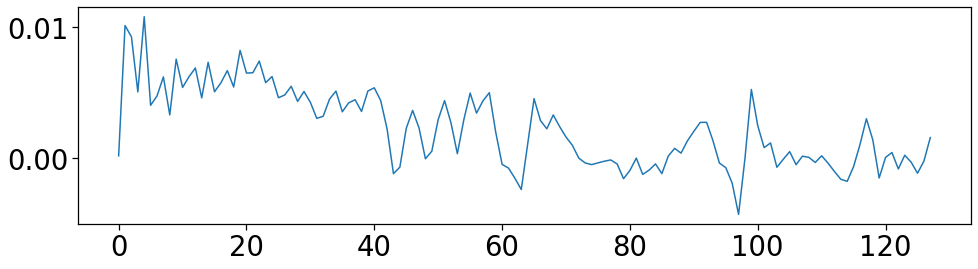

In [176]:
ts = df1.iloc[0]
plt.plot(ts)
plt.show()

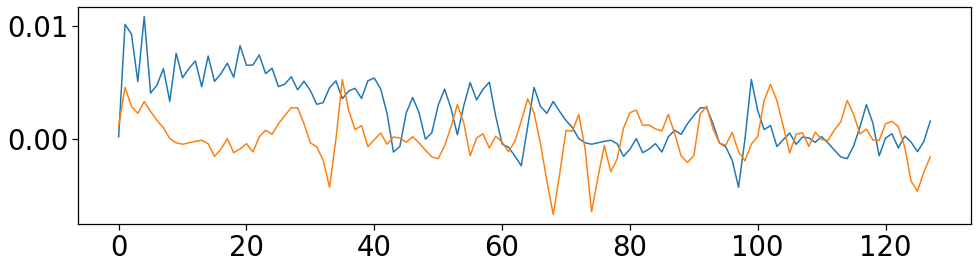

In [143]:
ts1 = df1.iloc[0]
ts2 = df1.iloc[1]
plt.plot(ts1)
plt.plot(ts2)
plt.show()

# Transformation

### Offset Translation

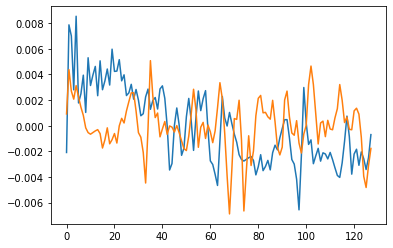

In [74]:
plt.plot(ts1 - ts1.mean())
plt.plot(ts2 - ts2.mean())
plt.show()

### Amplitude Scaling

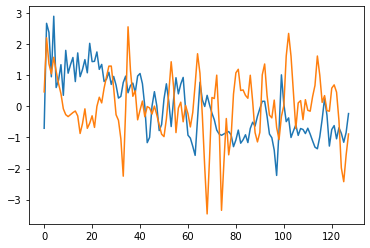

In [75]:
plt.plot((ts1 - ts1.mean())/ts1.std())
plt.plot((ts2 - ts2.mean())/ts2.std())
plt.show()

In [76]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

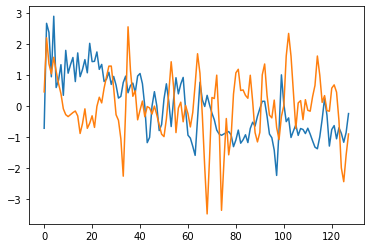

In [77]:
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
ts1_scaled = scaler.fit_transform(ts1.values.reshape(1, -1)).flatten()
ts2_scaled = scaler.fit_transform(ts2.values.reshape(1, -1)).flatten()

plt.plot(ts1_scaled)
plt.plot(ts2_scaled)
plt.show()

### Noise (smoothing) 

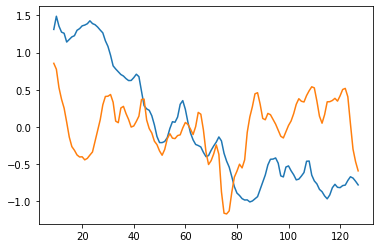

In [84]:
w = 10
plt.plot(((ts1 - ts1.mean())/ts1.std()).rolling(window=w).mean())
plt.plot(((ts2 - ts2.mean())/ts2.std()).rolling(window=w).mean())
plt.show()

### Trend Removal

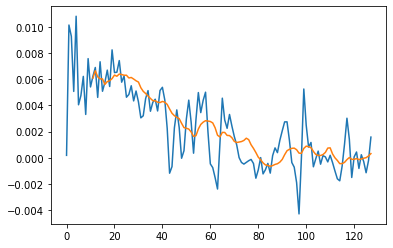

In [85]:
plt.plot(ts1)
plt.plot(ts1.rolling(window=12).mean())
plt.show()

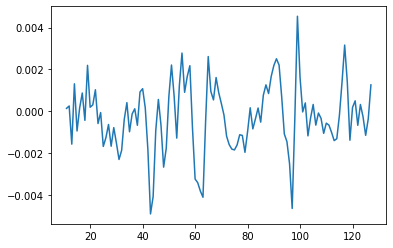

In [86]:
ts_shift = ts1 - ts1.rolling(window=12).mean()
plt.plot(ts_shift)
plt.show()

# Euclidean Distance

In [87]:
from scipy.spatial.distance import euclidean

In [88]:
dist = euclidean(ts1, ts2)
dist

0.04483715890309884

# Manhattan Distance

In [33]:
from scipy.spatial.distance import cityblock

In [41]:
dist = cityblock(ts1, ts2)
dist

0.41547590049600003

# Dinamic Time Warping

In [205]:
from tslearn.metrics import dtw, dtw_path, cdist_dtw, subsequence_cost_matrix
from scipy.spatial.distance import cdist

In [38]:
dist = dtw(ts1, ts2)
dist

0.020068338183782043

In [65]:
path, dist = dtw_path(ts1[:10], ts2[:10])

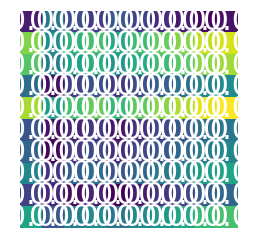

In [125]:
mat = cdist(ts1.values[:10].reshape(-1,1), ts2.values[:10].reshape(-1,1))

plt.imshow(mat)
plt.axis("off")
plt.autoscale(False)
for i in range(mat.shape[0]):
    for j in range(mat.shape[1]):
        text = plt.text(j, i, '%.1f' % mat[i, j], ha="center", va="center", color="w")
        
plt.show()

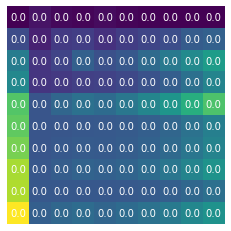

In [63]:
acc = subsequence_cost_matrix(ts1.values[:10].reshape(-1,1), ts2.values[:10].reshape(-1,1))

plt.imshow(acc)
plt.axis("off")
plt.autoscale(False)
for i in range(acc.shape[0]):
    for j in range(acc.shape[1]):
        text = plt.text(j, i, '%.1f' % np.sqrt(acc[i, j]), ha="center", va="center", color="w")
        
plt.show()

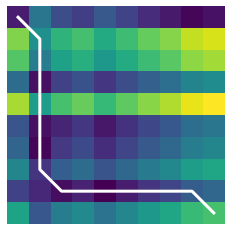

In [68]:
plt.imshow(mat)
plt.axis("off")
plt.autoscale(False)
plt.plot([j for (i, j) in path], [i for (i, j) in path], "w-", linewidth=3.)
plt.show()

In [69]:
path, dist = dtw_path(ts1[:10], ts2[:10], 
                      global_constraint="sakoe_chiba", sakoe_chiba_radius=2)
dist

0.014812855109464947

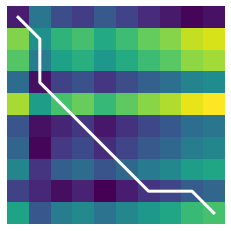

In [70]:
plt.imshow(mat)
plt.axis("off")
plt.autoscale(False)
plt.plot([j for (i, j) in path], [i for (i, j) in path], "w-", linewidth=3.)
plt.show()

In [71]:
path, dist = dtw_path(ts1[:10], ts2[:10], global_constraint="itakura", itakura_max_slope=2.)
dist

0.015160554508320228

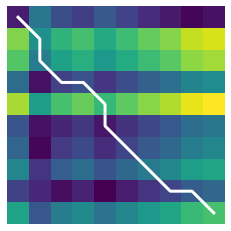

In [72]:
plt.imshow(mat)
plt.axis("off")
plt.autoscale(False)
plt.plot([j for (i, j) in path], [i for (i, j) in path], "w-", linewidth=3.)
plt.show()

In [73]:
cdist_dtw([ts1, ts2, ts])

array([[0.        , 0.02006834, 0.        ],
       [0.02006834, 0.        , 0.02006834],
       [0.        , 0.02006834, 0.        ]])

## DTW Implementation

In [95]:
%pylab inline
from pylab import rcParams
rcParams['figure.figsize'] = 16,4

Populating the interactive namespace from numpy and matplotlib


C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['text', 'mat']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [96]:
def dtw(x, y, dist):
    """
    Computes Dynamic Time Warping (DTW) of two sequences.

    :param array x: N1*M array
    :param array y: N2*M array
    :param func dist: distance used as cost measure

    Returns the minimum distance, the cost matrix, the accumulated cost matrix, and the wrap path.
    """
    assert len(x)
    assert len(y)
    r, c = len(x), len(y)
    
    # D0 = D1 = matrix of point-to-point costs
    D0 = zeros((r + 1, c + 1))
    D0[0, 1:] = inf
    D0[1:, 0] = inf
    D1 = D0[1:, 1:] # view (hide first column and first row)
    
    # Fill the point-to-point costs matrix
    for i in range(r):
        for j in range(c):
            D1[i, j] = dist(x[i], y[j])
            
    # C = matrix of optimal paths costs
    C = D1.copy()
    for i in range(r):
        for j in range(c):
            D1[i, j] += min(D0[i, j], D0[i, j+1], D0[i+1, j])
    
    # Infer the path from matrix C
    if len(x)==1:
        path = zeros(len(y)), range(len(y))  # special case 1
    elif len(y) == 1:
        path = range(len(x)), zeros(len(x))  # special case 2
    else:
        path = _traceback(D0)  # general case
        
    return D1[-1, -1], C, D1, path

# Function for inferring the optimal path (general case)
# Starts from last cell and goes backward...
def _traceback(D):
    i, j = array(D.shape) - 2
    p, q = [i], [j]
    while ((i > 0) or (j > 0)):
        tb = argmin((D[i, j], D[i, j+1], D[i+1, j]))
        if (tb == 0):
            i -= 1
            j -= 1
        elif (tb == 1):
            i -= 1
        else: # (tb == 2):
            j -= 1
        p.insert(0, i)
        q.insert(0, j)
    return array(p), array(q)

In [117]:
def distance(x,y):
    return euclidean(ts1_scaled, ts2_scaled)

In [118]:
(dist, cost, acc, path) = dtw(ts1_scaled, ts2_scaled, distance)

In [113]:
def nice_table(cost_matrix, title, first_timeseries, second_timeseries):
    import seaborn as sns
    import pandas as pd
    df = pd.DataFrame(cost_matrix.transpose().astype(int))[::-1]
    df.columns = first_timeseries
    df.index = second_timeseries[::-1]
    mask = np.zeros_like(df)
    for i in range(df.shape[0]):
        for j in range(df.shape[1]):
            if(np.array(df)[i][j] == -1):
                mask[i][j] = True
    sns.set_context('notebook', font_scale=2.5)
    ax = sns.heatmap(df, annot=True, fmt="d", cbar=False, mask=mask)
    ax.set_title(title)

In [114]:
def matrix_and_best_path(mymatrix,path):
    import seaborn as sns
    sns.reset_orig()
    sns.set_context('notebook', font_scale=2.5)
    imshow(mymatrix.T, origin='lower', cmap=cm.gray, interpolation='nearest')
    title('Optimal path')
    plot(path[0], path[0], 'c-')
    plot(path[0], path[1], 'y')
    plot(path[0], path[1], 'ro')
    xlim(-0.5,mymatrix.shape[0]-0.5)
    ylim(-0.5,mymatrix.shape[1]-0.5)

In [119]:
acc

array([[  15.11271617,   30.22543235,   45.33814852, ..., 1904.202238  ,
        1919.31495418, 1934.42767035],
       [  30.22543235,   30.22543235,   45.33814852, ..., 1904.202238  ,
        1919.31495418, 1934.42767035],
       [  45.33814852,   45.33814852,   45.33814852, ..., 1904.202238  ,
        1919.31495418, 1934.42767035],
       ...,
       [1904.202238  , 1904.202238  , 1904.202238  , ..., 1904.202238  ,
        1919.31495418, 1934.42767035],
       [1919.31495418, 1919.31495418, 1919.31495418, ..., 1919.31495418,
        1919.31495418, 1934.42767035],
       [1934.42767035, 1934.42767035, 1934.42767035, ..., 1934.42767035,
        1934.42767035, 1934.42767035]])

In [121]:
path

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127]),
 array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  

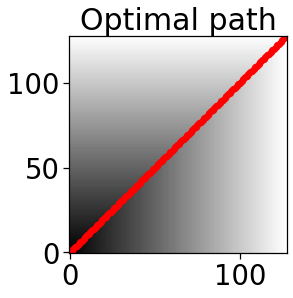

In [120]:
matrix_and_best_path(acc,path)

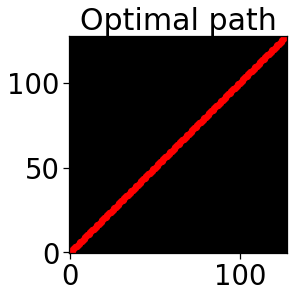

In [108]:
matrix_and_best_path(cost,path)

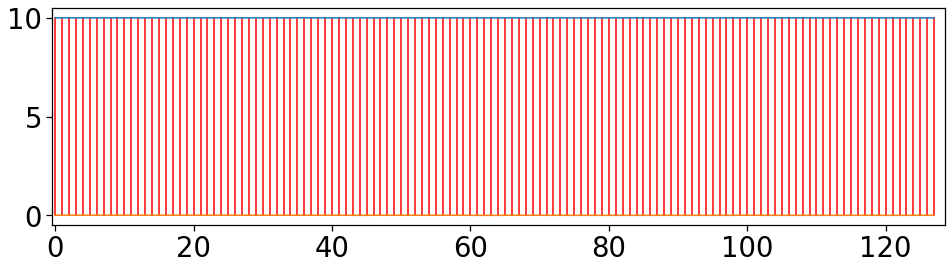

In [122]:
yshift = 10  # shifts y a bit to make the plot more readable
for (i,j) in zip(path[0],path[1]):
    col = 'r-' if i == j else 'y-'
    plot([ i, j ] , [ ts1[i], ts2[j]+yshift ], col)
xlim(-0.5,max(len(ts1),len(ts2))+0.5)
plot(ts2+yshift)
plot(ts1)
show()

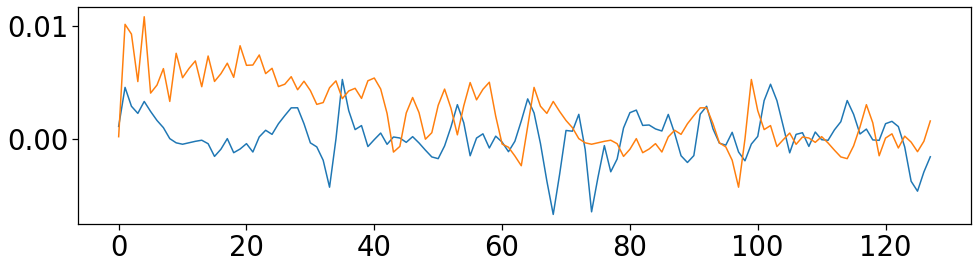

In [126]:
winsmooth = 100
ysmooth = pd.Series(abs(ts1)).rolling(window=winsmooth).mean()
ysmooth2 = pd.Series(abs(ts2)).rolling(window=winsmooth).mean()

samples = [winsmooth*i for i in range(len(ysmooth)//winsmooth)]
samples2 = [winsmooth*i for i in range(len(ysmooth2)//winsmooth)]

plot(ts2)
plot(ts1)
show()

## DTW with Sakoe-Chiba band

In [129]:
def dtw_band(x, y, dist, band=inf):
    """
    Computes Dynamic Time Warping (DTW) of two sequences with Sakoe-Chiba band.

    :param array x: N1*M array
    :param array y: N2*M array
    :param func dist: distance used as cost measure
    :param int band: size of Sakow-Chiba band (default=inf)

    Returns the minimum distance, the cost matrix, the accumulated cost matrix, and the wrap path.
    """
    assert len(x)
    assert len(y)
    r, c = len(x), len(y)
    
    # D0 = D1 = matrix of point-to-point costs
    D0 = zeros((r + 1, c + 1))
    D0[0, 1:] = inf
    D0[1:, 0] = inf
    D1 = D0[1:, 1:] # view (hide first column and first row)
    
    # Fill the point-to-point costs matrix
    # Effect of bands: cells farther than "band" from diagonal have "inf" cost
    for i in range(r):
        for j in range(c):
            D1[i, j] = dist(x[i], y[j]) if abs(i-j)<band else inf
            
    # C = matrix of optimal paths costs
    C = D1.copy()
    for i in range(r):
        for j in range(c):
            D1[i, j] += min(D0[i, j], D0[i, j+1], D0[i+1, j])
    
    # Infer the path from matrix C
    if len(x)==1:
        path = zeros(len(y)), range(len(y))  # special case 1
    elif len(y) == 1:
        path = range(len(x)), zeros(len(x))  # special case 2
    else:
        path = _traceback(D0)  # general case
        
    return D1[-1, -1], C, D1, path

# Function for inferring the optima path (general case)
# Starts from last cell and goes backward...
def _traceback(D):
    i, j = array(D.shape) - 2
    p, q = [i], [j]
    while ((i > 0) or (j > 0)):
        tb = argmin((D[i, j], D[i, j+1], D[i+1, j]))
        if (tb == 0):
            i -= 1
            j -= 1
        elif (tb == 1):
            i -= 1
        else: # (tb == 2):
            j -= 1
        p.insert(0, i)
        q.insert(0, j)
    return array(p), array(q)

# KNN

In [164]:
directory1 = 'C:/Users/Admin/Desktop/Magistrale/Primo anno/Secondo semestre/DM2/UCI HAR Dataset/test/Inertial Signals/'

In [165]:
df1_test = pd.read_csv(directory1+'body_acc_x_test.txt', delim_whitespace=True, header=None) #load data

In [166]:
df2_test = pd.read_csv(directory1+'body_acc_y_test.txt', delim_whitespace=True, header=None) #load data

In [167]:
df3_test = pd.read_csv(directory1+'body_acc_z_test.txt', delim_whitespace=True, header=None) #load data

In [168]:
df4_test = pd.read_csv(directory1+'body_gyro_x_test.txt', delim_whitespace=True, header=None) #load data

In [169]:
df5_test = pd.read_csv(directory1+'body_gyro_y_test.txt', delim_whitespace=True, header=None) #load data

In [170]:
df6_test = pd.read_csv(directory1+'body_gyro_z_test.txt', delim_whitespace=True, header=None) #load data

In [171]:
df7_test = pd.read_csv(directory1+'total_acc_x_test.txt', delim_whitespace=True, header=None) #load data

In [172]:
df8_test = pd.read_csv(directory1+'total_acc_y_test.txt', delim_whitespace=True, header=None) #load data

In [173]:
df9_test = pd.read_csv(directory1+'total_acc_z_test.txt', delim_whitespace=True, header=None) #load data

In [177]:
ts_test = df1_test.iloc[0]

In [321]:
def classifyNN(k:int, idx:int) -> int:
    
    idxs=range(0,df1.shape[0])
    n=df1.shape[0]
    distances=[]
    counters={}
    c=1;
    max_value=0
    for r in range(n):
        distances.append(dtw.distance(df1_trap[idx], df1[idxs[r]],window=10,use_pruning=True))
        NN=sorted(range(len(distances)), key=lambda i: distances[i], reverse=False)[:k]
    
    for l in labels.values():
        counters[l]=0
        for r in NN:
            l=labels[y_train[r]]
        counters[l]+=1
        if (counters[l])>max_value:
            max_value=counters[l]
        #print('NN(%d) has label %s' % (c,l))
        c+=1
    
    # find the label(s) with the highest frequency
    keys = [k for k in counters if counters[k] == max_value]
    
    # in case of a tie, return one at random
    return (sample(keys,1)[0])

In [322]:
labels = {1:'WALKING', 2:'WALKING UPSTAIRS', 3:'WALKING DOWNSTAIRS',
          4:'SITTING', 5:'STANDING', 6:'LAYING'}

In [323]:
y_test = open(r'UCI HAR Dataset/test/y_test.txt', 'r').readlines()
y_train = open(r'UCI HAR Dataset/train/y_train.txt', 'r').readlines()

In [324]:
colors = ['#D62728','#2C9F2C','#FD7F23','#1F77B4','#9467BD',
          '#8C564A','#7F7F7F','#1FBECF','#E377C2','#BCBD27']

In [325]:
df1_trap = df1_test.values.T

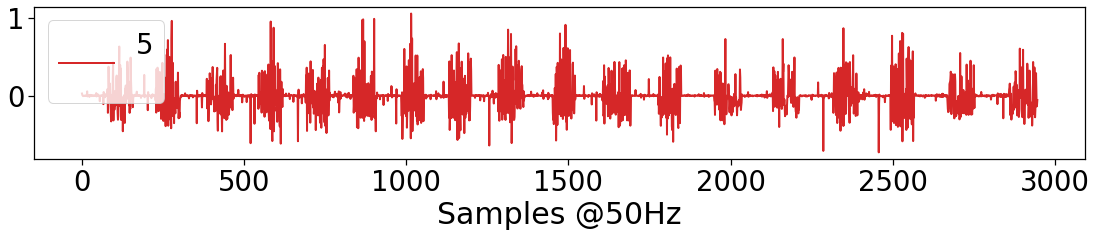

In [326]:
k=20
idx=3
plt.plot(df1_trap[idx], label=y_test[idx], color='#D62728', linewidth=2)
plt.xlabel('Samples @50Hz')
plt.legend(loc='upper left')
plt.tight_layout()

In [327]:
y_train[3]

'5\n'

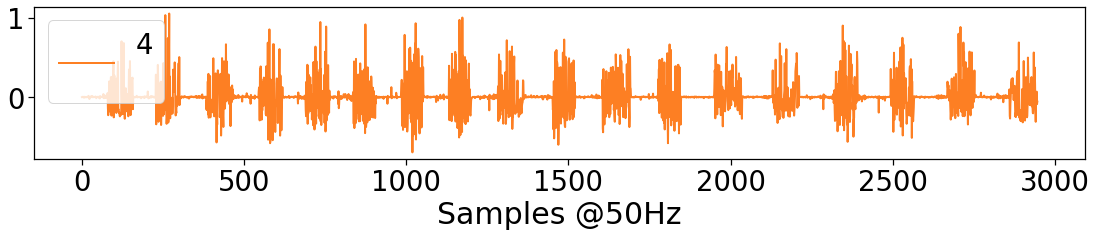

In [328]:
k=20
idx=50
plt.plot(df1_trap[idx], label=y_test[idx], color='#FD7F23', linewidth=2)
plt.xlabel('Samples @50Hz')
plt.legend(loc='upper left')
plt.tight_layout()

In [329]:
y_train[50]

'4\n'

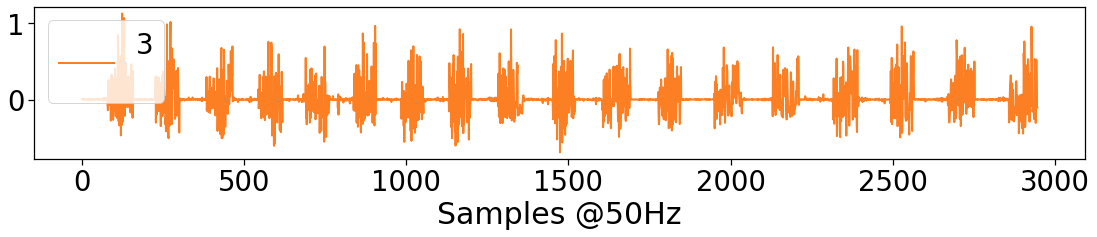

In [330]:
k=20
idx=120
plt.plot(df1_trap[idx], label=y_test[idx], color='#FD7F23', linewidth=2)
plt.xlabel('Samples @50Hz')
plt.legend(loc='upper left')
plt.tight_layout()

In [331]:
y_train[120]

'1\n'

In [334]:
k=20
idx=130
plt.plot(df1_trap[idx], label=y_test[idx], color='#FD7F23', linewidth=2)
plt.xlabel('Samples @50Hz')
plt.legend(loc='upper left')
plt.tight_layout()

IndexError: index 130 is out of bounds for axis 0 with size 128

In [275]:
df1_trap.shape

(128, 2947)

In [276]:
df1_test.shape

(2947, 128)

# Features Extraction

In [89]:
import numpy as np
import scipy.stats as stats

In [90]:
def calculate_features(values):
    features = {
        'avg': np.mean(values),
        'std': np.std(values),
        'var': np.var(values),
        'med': np.median(values),
        '10p': np.percentile(values, 10),
        '25p': np.percentile(values, 25),
        '50p': np.percentile(values, 50),
        '75p': np.percentile(values, 75),
        '90p': np.percentile(values, 90),
        'iqr': np.percentile(values, 75) - np.percentile(values, 25),
        'cov': 1.0 * np.mean(values) / np.std(values),
        'skw': stats.skew(values),
        'kur': stats.kurtosis(values)
    }

    return features

In [92]:
features = calculate_features(ts1)
features

{'avg': 0.0022686904413437505,
 'std': 0.0029410289558784645,
 'var': 8.649651319315572e-06,
 'med': 0.00202466,
 '10p': -0.00095442736,
 '25p': -0.0002468439,
 '50p': 0.00202466,
 '75p': 0.004565122749999999,
 '90p': 0.0062159357,
 'iqr': 0.004811966649999999,
 'cov': 0.7713934392958429,
 'skw': 0.4811107109927944,
 'kur': -0.39579669863538713}

In [94]:
from tsfresh.feature_extraction import extract_features
from tsfresh.feature_extraction import ComprehensiveFCParameters

ModuleNotFoundError: No module named 'tsfresh'